# WORK for P03

## [Work-1]（提出課題）
分類器を評価するスコアにAUCという指標がある（正解率とは定義が違う別の評価指標）。AUCとは何かを調査しパワポ2枚以下でまとめ、次回講義の前日までにslack（ワーク提出用）へ提出下さい（パワポまたはPDF）。ファイル名は「P03WK1_yourname」（yournameはあなたの氏名）として下さい。<br>
【キーワード】ROC曲線、AUCスコア

## [Work-2]
以下ページなどを参考に、sklearnにおけるAUCの取得方法を確認せよ。<br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

Work-2 ans<br>
AUC取得方法  ：予測スコアからROC曲線を算出し面積を計算します。
①sklearnライブラリからmetricsをインポート  
from sklearn import metrics 

②スコアと正解データからROC曲線を算出 ,TPRとFPRを算出
●TPR：モデルが正と判断して正解だった割合  
●FPR：モデルが正と判断して不正解だった割合<br>
<br>
③metrics.auc(FPR、TPR)でAUCを計算


In [2]:
# Load and return the breast cancer wisconsin dataset (classification).
# The breast cancer dataset is a classic and very easy binary classification dataset.
import pandas as pd
from sklearn.datasets import load_breast_cancer
# set data by role
dataset = load_breast_cancer()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.Series(dataset.target, name='y')

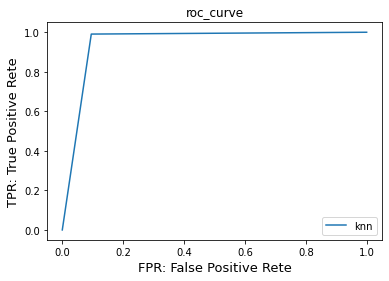

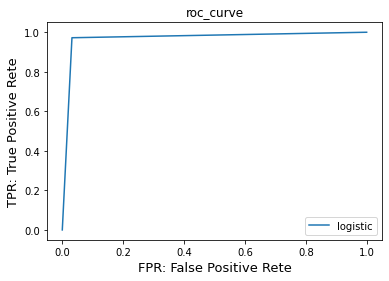

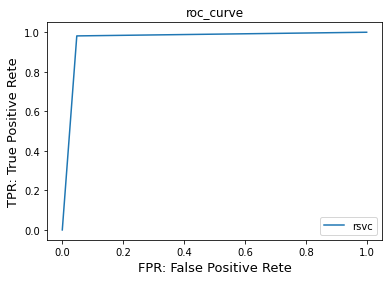

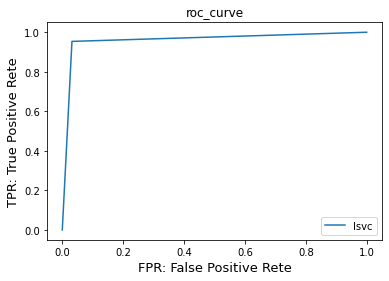

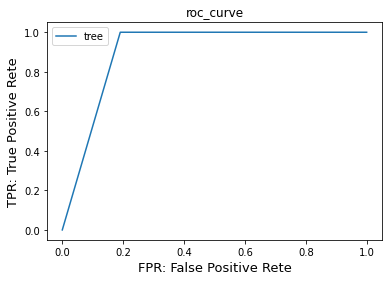

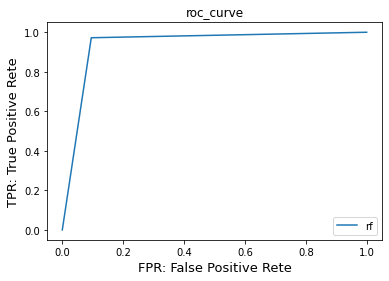

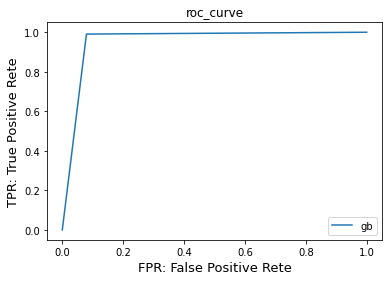

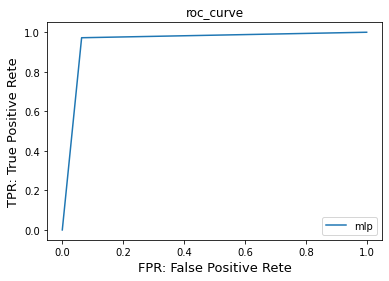

,auc
gb,0.955688
knn,0.947751
logistic,0.970238
lsvc,0.960979
mlp,0.954365
rf,0.938492
rsvc,0.966931
tree,0.904762


In [56]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,plot_roc_curve,auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# holdout
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.3,
                                               random_state=1)
# set pipelines for different algorithms
pipelines = {
    'knn':
        Pipeline([('scl',StandardScaler()),
                  ('est',KNeighborsClassifier())]),
    'logistic':
        Pipeline([('scl',StandardScaler()),
                  ('est',LogisticRegression(random_state=1))]),
    'rsvc':
        Pipeline([('scl',StandardScaler()),
                  ('est',SVC(C=1.0, kernel='rbf', random_state=1))]),
    'lsvc':
        Pipeline([('scl',StandardScaler()),
                  ('est',LinearSVC(C=1.0, random_state=1))]),
    'tree':
        Pipeline([('scl',StandardScaler()),
                  ('est',DecisionTreeClassifier(random_state=1))]),
    'rf':
        Pipeline([('scl',StandardScaler()),
                  ('est',RandomForestClassifier(random_state=1))]),
    'gb':
        Pipeline([('scl',StandardScaler()),
                  ('est',GradientBoostingClassifier(random_state=1))]),
    'mlp': #ニューラルネットワーク
        Pipeline([('scl',StandardScaler()),
                  ('est',MLPClassifier(hidden_layer_sizes=(3,3),
                                       max_iter=1000,
                                       random_state=1))])
}
# fit & evaluation
scores = {}
pred={}
vl={}
for pipe_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred= pipeline.predict(X_test)
    pred[(pipe_name,'y_pred')] = y_pred
    fpr, tpr, thresholds = roc_curve(y_test,y_pred)
    #cm=confusion_matrix(y_test, y_pred)
    #print(cm)
    #print(fpr,tpr)
    #vl[(pipe_name,'fpr','tpr')]=fpr,tpr
    scores[(pipe_name,'auc')] = auc(fpr,tpr)

    plt.plot(fpr, tpr,label=pipe_name)
    plt.xlabel('FPR: False Positive Rete', fontsize = 13)
    plt.ylabel('TPR: True Positive Rete', fontsize = 13)
    plt.title("roc_curve")
    plt.legend()
    plt.show()

#pd.Series(vl).unstack()
pd.Series(scores).unstack()
